<a href="https://colab.research.google.com/github/ID-L0NG3/Analytics-Project/blob/main/Page_View_Time_Series_Visualiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


In [7]:
# Transforming the data into a database
import io
uploaded_filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

display(df.head())

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [ ]:
df.shape

(1304, 2)

In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
display(df.head())

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [9]:
# Calculate the 2.5th and 97.5th percentiles
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

# Filter the DataFrame
df_filtered = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

display(df_filtered.head())

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [9]:
def draw_line_plot(df, title, xlabel, ylabel, color):
    plt.figure(figsize=(25, 6))
    plt.plot(df.index, df['value'], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt


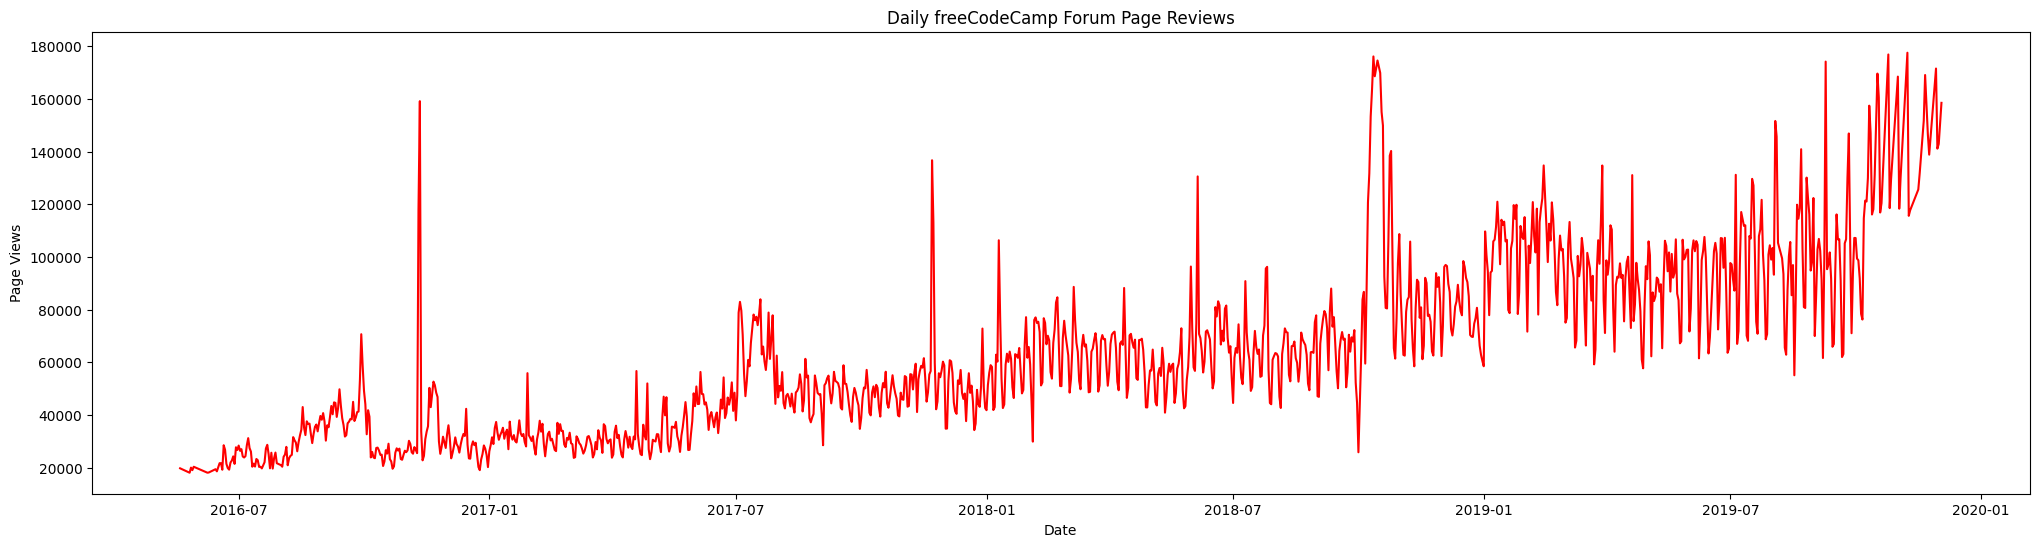

In [10]:
draw_line_plot(df=df_filtered, title='Daily freeCodeCamp Forum Page Reviews', xlabel='Date', ylabel='Page Views', color='red')

In [11]:
def draw_box_plot(df, title, xlabel, ylabel):
  plt.figure(figsize=(12,6))

  # Prepare data for box plots
  df['year'] = df.index.year
  df['month'] = df.index.month_name()

  # Create box plot for year-wise distribution
  plt.subplot(1, 2, 1)
  sns.boxplot(x='year', y='value', data=df)
  plt.title('Year-wise Box Plot (Page Views)')
  plt.xlabel('Year')
  plt.ylabel('Page Views')

  # Create box plot for month-wise distribution
  plt.subplot(1, 2, 2)
  # Order the months correctly
  month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
  sns.boxplot(x='month', y='value', data=df, order=month_order)
  plt.title('Month-wise Box Plot (Page Views)')
  plt.xlabel('Month')
  plt.ylabel('Page Views')
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

/tmp/ipython-input-11-4022424310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
/tmp/ipython-input-11-4022424310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month_name()


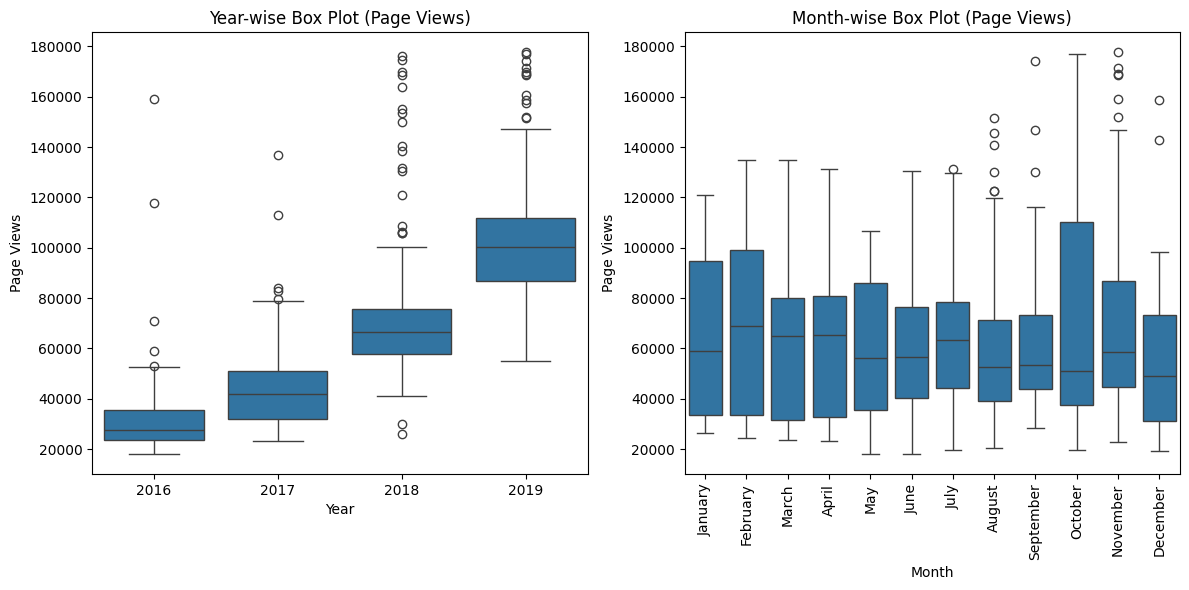

In [12]:
draw_box_plot(df_filtered, 'Year-wise and Month-wise Box Plot (Page Views)', 'Year/Month', 'Page Views')

In [10]:
def draw_bar_plot():
  # Copy the filtered DataFrame to avoid SettingWithCopyWarning
  df_bar = df_filtered.copy()

  # Extract year and month
  df_bar['year'] = df_bar.index.year
  df_bar['month'] = df_bar.index.month

  # Group by year and month and calculate the average
  df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

  # Map month numbers to month names
  df_bar['month'] = pd.to_datetime(df_bar['month'], format='%m').dt.strftime('%B')

  # Create the bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(x='year', y='value', hue='month', data=df_bar, palette='viridis')
  plt.title('Average Daily Page Views by Year and Month')
  plt.xlabel('Year')
  plt.ylabel('Average Page Views')
  plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.show()

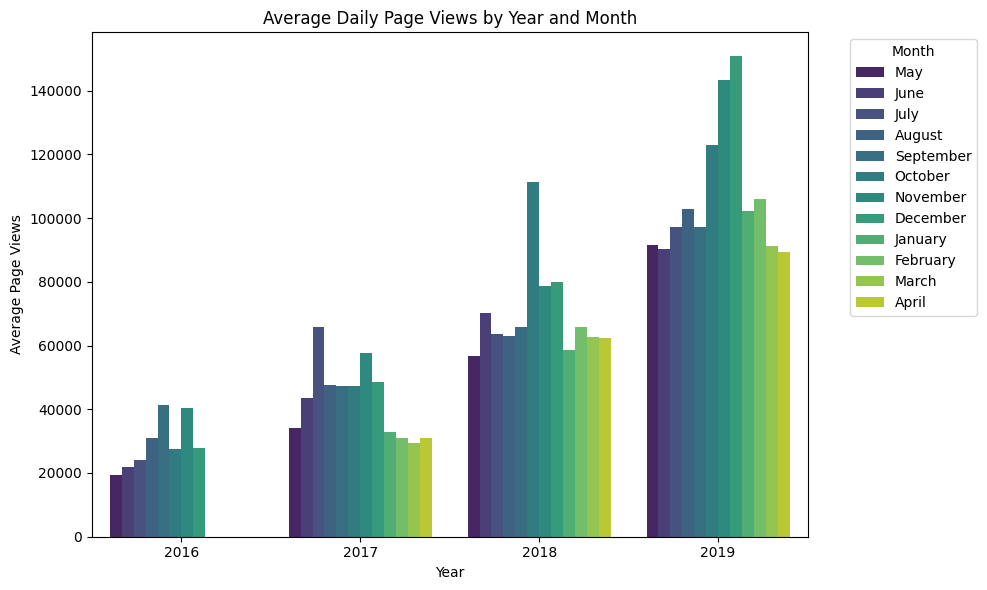

In [11]:
draw_bar_plot()